In [1]:
from keras.datasets import imdb
from keras import models, layers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
import os, tqdm
import numpy as np

C:\Users\bin b zhu\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
imdb_dir = 'aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

In [3]:
labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in tqdm.tqdm(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            with open(os.path.join(dir_name, fname), encoding='utf-8') as f:
                texts.append(f.read())
            labels.append(0 if label_type == 'neg' else 1)

100%|████████████████████████████████████████████████████████████████████████████| 12500/12500 [19:29<00:00, 10.69it/s]


In [21]:
import pickle

In [23]:
with open('imdb_texts.pkl', 'wb') as f:
    pickle.dump(texts, f)

with open('imdb_labels.pkl', 'wb') as f:
    pickle.dump(labels, f)

In [46]:
with open('imdb_texts.pkl', 'rb') as f:
    texts = pickle.load(f)

with open('imdb_labels.pkl', 'rb') as f:
    labels = pickle.load(f)

In [4]:
labels = np.asarray(labels)

In [76]:
max_words = 10000
embedding_dim = 100
max_len = 500
training_samples = 20000
validatoin_samples = 5000

In [101]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

data = sequence.pad_sequences(sequences, maxlen=max_len)

In [77]:
data.shape

(25000, 500)

In [102]:
word_index = tokenizer.word_index

In [78]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)

In [79]:
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples : training_samples + validatoin_samples]
y_val = labels[training_samples : training_samples + validatoin_samples]

In [80]:
x_train.shape

(20000, 500)

In [49]:
embedding_index = {}
with open('glove.6B/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in tqdm.tqdm(f):
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

400000it [00:13, 28621.96it/s]


In [68]:
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [63]:
model = models.Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 500, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 50000)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1600032   
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 2,600,065
Trainable params: 2,600,065
Non-trainable params: 0
_________________________________________________________________


In [92]:
# pre-trained glove word embedding
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [106]:
model = models.Sequential()
model.add(layers.Embedding(max_words, 32, input_length=max_len))
#model.add(layers.SimpleRNN(32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                16640     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 65        
Total params: 336,705
Trainable params: 336,705
Non-trainable params: 0
_________________________________________________________________


In [108]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [81]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - ETA: 1:24 - loss: 1.9612 - acc: 0.476 - ETA: 1:21 - loss: 1.6400 - acc: 0.476 - ETA: 1:18 - loss: 1.4391 - acc: 0.474 - ETA: 1:16 - loss: 1.3187 - acc: 0.496 - ETA: 1:15 - loss: 1.2592 - acc: 0.498 - ETA: 1:14 - loss: 1.2231 - acc: 0.494 - ETA: 1:13 - loss: 1.1927 - acc: 0.484 - ETA: 1:13 - loss: 1.1514 - acc: 0.485 - ETA: 1:13 - loss: 1.1298 - acc: 0.482 - ETA: 1:12 - loss: 1.1088 - acc: 0.485 - ETA: 1:12 - loss: 1.0938 - acc: 0.485 - ETA: 1:11 - loss: 1.0715 - acc: 0.490 - ETA: 1:10 - loss: 1.0514 - acc: 0.492 - ETA: 1:10 - loss: 1.0327 - acc: 0.497 - ETA: 1:09 - loss: 1.0193 - acc: 0.499 - ETA: 1:08 - loss: 1.0035 - acc: 0.504 - ETA: 1:08 - loss: 0.9911 - acc: 0.506 - ETA: 1:07 - loss: 0.9831 - acc: 0.508 - ETA: 1:07 - loss: 0.9736 - acc: 0.511 - ETA: 1:06 - loss: 0.9679 - acc: 0.512 - ETA: 1:06 - loss: 0.9657 - acc: 0.507 - ETA: 1:05 - loss: 0.9622 - acc: 0.504 - ETA: 1:05 - l

20000/20000 [==============================] - ETA: 1:28 - loss: 0.6909 - acc: 0.515 - ETA: 1:29 - loss: 0.6898 - acc: 0.535 - ETA: 1:37 - loss: 0.6906 - acc: 0.531 - ETA: 1:41 - loss: 0.6898 - acc: 0.521 - ETA: 1:45 - loss: 0.6885 - acc: 0.531 - ETA: 1:45 - loss: 0.6891 - acc: 0.524 - ETA: 1:42 - loss: 0.6888 - acc: 0.525 - ETA: 1:39 - loss: 0.6897 - acc: 0.520 - ETA: 1:37 - loss: 0.6887 - acc: 0.533 - ETA: 1:36 - loss: 0.6888 - acc: 0.539 - ETA: 1:34 - loss: 0.6888 - acc: 0.537 - ETA: 1:32 - loss: 0.6890 - acc: 0.536 - ETA: 1:31 - loss: 0.6888 - acc: 0.538 - ETA: 1:31 - loss: 0.6890 - acc: 0.541 - ETA: 1:32 - loss: 0.6888 - acc: 0.540 - ETA: 1:32 - loss: 0.6890 - acc: 0.539 - ETA: 1:32 - loss: 0.6883 - acc: 0.542 - ETA: 1:32 - loss: 0.6881 - acc: 0.543 - ETA: 1:31 - loss: 0.6879 - acc: 0.541 - ETA: 1:30 - loss: 0.6882 - acc: 0.541 - ETA: 1:28 - loss: 0.6879 - acc: 0.543 - ETA: 1:27 - loss: 0.6880 - acc: 0.543 - ETA: 1:26 - loss: 0.6879 - acc: 0.545 - ETA: 1:25 - loss: 0.6882 - acc: 0

20000/20000 [==============================] - ETA: 1:43 - loss: 0.6724 - acc: 0.640 - ETA: 1:38 - loss: 0.6791 - acc: 0.601 - ETA: 1:35 - loss: 0.6763 - acc: 0.604 - ETA: 1:35 - loss: 0.6742 - acc: 0.607 - ETA: 1:34 - loss: 0.6719 - acc: 0.614 - ETA: 1:34 - loss: 0.6714 - acc: 0.613 - ETA: 1:34 - loss: 0.6718 - acc: 0.599 - ETA: 1:34 - loss: 0.6721 - acc: 0.599 - ETA: 1:32 - loss: 0.6740 - acc: 0.597 - ETA: 1:31 - loss: 0.6748 - acc: 0.593 - ETA: 1:31 - loss: 0.6748 - acc: 0.596 - ETA: 1:31 - loss: 0.6752 - acc: 0.592 - ETA: 1:30 - loss: 0.6754 - acc: 0.590 - ETA: 1:30 - loss: 0.6745 - acc: 0.593 - ETA: 1:30 - loss: 0.6742 - acc: 0.597 - ETA: 1:29 - loss: 0.6743 - acc: 0.593 - ETA: 1:28 - loss: 0.6748 - acc: 0.591 - ETA: 1:27 - loss: 0.6737 - acc: 0.595 - ETA: 1:26 - loss: 0.6730 - acc: 0.597 - ETA: 1:26 - loss: 0.6745 - acc: 0.590 - ETA: 1:25 - loss: 0.6746 - acc: 0.590 - ETA: 1:24 - loss: 0.6737 - acc: 0.592 - ETA: 1:23 - loss: 0.6736 - acc: 0.592 - ETA: 1:22 - loss: 0.6733 - acc: 0

20000/20000 [==============================] - ETA: 1:24 - loss: 0.6485 - acc: 0.609 - ETA: 1:20 - loss: 0.6315 - acc: 0.660 - ETA: 1:18 - loss: 0.6199 - acc: 0.692 - ETA: 1:17 - loss: 0.6181 - acc: 0.705 - ETA: 1:20 - loss: 0.6180 - acc: 0.695 - ETA: 1:19 - loss: 0.6176 - acc: 0.681 - ETA: 1:18 - loss: 0.6135 - acc: 0.688 - ETA: 1:18 - loss: 0.6117 - acc: 0.687 - ETA: 1:18 - loss: 0.6135 - acc: 0.678 - ETA: 1:18 - loss: 0.6112 - acc: 0.679 - ETA: 1:17 - loss: 0.6175 - acc: 0.673 - ETA: 1:16 - loss: 0.6160 - acc: 0.675 - ETA: 1:15 - loss: 0.6123 - acc: 0.682 - ETA: 1:14 - loss: 0.6126 - acc: 0.677 - ETA: 1:14 - loss: 0.6106 - acc: 0.681 - ETA: 1:13 - loss: 0.6130 - acc: 0.678 - ETA: 1:12 - loss: 0.6149 - acc: 0.676 - ETA: 1:11 - loss: 0.6153 - acc: 0.672 - ETA: 1:11 - loss: 0.6164 - acc: 0.670 - ETA: 1:10 - loss: 0.6178 - acc: 0.666 - ETA: 1:09 - loss: 0.6170 - acc: 0.666 - ETA: 1:09 - loss: 0.6169 - acc: 0.666 - ETA: 1:08 - loss: 0.6170 - acc: 0.667 - ETA: 1:08 - loss: 0.6165 - acc: 0

20000/20000 [==============================] - ETA: 1:21 - loss: 0.5629 - acc: 0.773 - ETA: 1:21 - loss: 0.5411 - acc: 0.769 - ETA: 1:21 - loss: 0.5408 - acc: 0.752 - ETA: 1:17 - loss: 0.5457 - acc: 0.746 - ETA: 1:15 - loss: 0.5418 - acc: 0.754 - ETA: 1:14 - loss: 0.5450 - acc: 0.751 - ETA: 1:12 - loss: 0.5510 - acc: 0.738 - ETA: 1:12 - loss: 0.5508 - acc: 0.736 - ETA: 1:11 - loss: 0.5516 - acc: 0.735 - ETA: 1:10 - loss: 0.5575 - acc: 0.725 - ETA: 1:09 - loss: 0.5582 - acc: 0.728 - ETA: 1:08 - loss: 0.5567 - acc: 0.730 - ETA: 1:08 - loss: 0.5572 - acc: 0.724 - ETA: 1:07 - loss: 0.5570 - acc: 0.723 - ETA: 1:07 - loss: 0.5597 - acc: 0.720 - ETA: 1:06 - loss: 0.5588 - acc: 0.720 - ETA: 1:06 - loss: 0.5581 - acc: 0.717 - ETA: 1:05 - loss: 0.5565 - acc: 0.719 - ETA: 1:05 - loss: 0.5572 - acc: 0.719 - ETA: 1:05 - loss: 0.5574 - acc: 0.719 - ETA: 1:04 - loss: 0.5575 - acc: 0.718 - ETA: 1:04 - loss: 0.5555 - acc: 0.721 - ETA: 1:03 - loss: 0.5567 - acc: 0.719 - ETA: 1:03 - loss: 0.5548 - acc: 0

20000/20000 [==============================] - ETA: 1:11 - loss: 0.6069 - acc: 0.679 - ETA: 1:13 - loss: 0.5641 - acc: 0.722 - ETA: 1:13 - loss: 0.5351 - acc: 0.744 - ETA: 1:13 - loss: 0.5457 - acc: 0.728 - ETA: 1:12 - loss: 0.5380 - acc: 0.735 - ETA: 1:11 - loss: 0.5356 - acc: 0.735 - ETA: 1:10 - loss: 0.5307 - acc: 0.743 - ETA: 1:10 - loss: 0.5265 - acc: 0.745 - ETA: 1:09 - loss: 0.5224 - acc: 0.743 - ETA: 1:09 - loss: 0.5244 - acc: 0.741 - ETA: 1:08 - loss: 0.5264 - acc: 0.737 - ETA: 1:07 - loss: 0.5243 - acc: 0.740 - ETA: 1:07 - loss: 0.5220 - acc: 0.742 - ETA: 1:06 - loss: 0.5276 - acc: 0.737 - ETA: 1:06 - loss: 0.5243 - acc: 0.739 - ETA: 1:05 - loss: 0.5252 - acc: 0.740 - ETA: 1:05 - loss: 0.5245 - acc: 0.742 - ETA: 1:04 - loss: 0.5267 - acc: 0.741 - ETA: 1:04 - loss: 0.5286 - acc: 0.740 - ETA: 1:03 - loss: 0.5280 - acc: 0.739 - ETA: 1:03 - loss: 0.5245 - acc: 0.740 - ETA: 1:03 - loss: 0.5241 - acc: 0.741 - ETA: 1:02 - loss: 0.5229 - acc: 0.743 - ETA: 1:02 - loss: 0.5201 - acc: 0

20000/20000 [==============================] - ETA: 1:22 - loss: 0.6175 - acc: 0.648 - ETA: 1:16 - loss: 0.5429 - acc: 0.707 - ETA: 1:18 - loss: 0.5241 - acc: 0.708 - ETA: 1:16 - loss: 0.4961 - acc: 0.738 - ETA: 1:14 - loss: 0.4961 - acc: 0.735 - ETA: 1:13 - loss: 0.4845 - acc: 0.751 - ETA: 1:12 - loss: 0.4725 - acc: 0.767 - ETA: 1:12 - loss: 0.4836 - acc: 0.762 - ETA: 1:12 - loss: 0.4811 - acc: 0.764 - ETA: 1:12 - loss: 0.4824 - acc: 0.767 - ETA: 1:11 - loss: 0.4761 - acc: 0.772 - ETA: 1:10 - loss: 0.4839 - acc: 0.767 - ETA: 1:09 - loss: 0.4840 - acc: 0.766 - ETA: 1:09 - loss: 0.4901 - acc: 0.761 - ETA: 1:08 - loss: 0.4890 - acc: 0.758 - ETA: 1:08 - loss: 0.4861 - acc: 0.762 - ETA: 1:08 - loss: 0.4813 - acc: 0.765 - ETA: 1:07 - loss: 0.4826 - acc: 0.762 - ETA: 1:07 - loss: 0.4800 - acc: 0.764 - ETA: 1:06 - loss: 0.4801 - acc: 0.764 - ETA: 1:06 - loss: 0.4809 - acc: 0.763 - ETA: 1:05 - loss: 0.4807 - acc: 0.764 - ETA: 1:04 - loss: 0.4795 - acc: 0.766 - ETA: 1:04 - loss: 0.4792 - acc: 0

20000/20000 [==============================] - ETA: 1:08 - loss: 0.4467 - acc: 0.773 - ETA: 1:08 - loss: 0.4423 - acc: 0.785 - ETA: 1:09 - loss: 0.4470 - acc: 0.783 - ETA: 1:09 - loss: 0.4378 - acc: 0.791 - ETA: 1:08 - loss: 0.4298 - acc: 0.806 - ETA: 1:08 - loss: 0.4324 - acc: 0.804 - ETA: 1:08 - loss: 0.4303 - acc: 0.803 - ETA: 1:07 - loss: 0.4289 - acc: 0.804 - ETA: 1:07 - loss: 0.4254 - acc: 0.805 - ETA: 1:07 - loss: 0.4266 - acc: 0.805 - ETA: 1:06 - loss: 0.4263 - acc: 0.806 - ETA: 1:06 - loss: 0.4278 - acc: 0.805 - ETA: 1:05 - loss: 0.4258 - acc: 0.806 - ETA: 1:05 - loss: 0.4259 - acc: 0.801 - ETA: 1:05 - loss: 0.4273 - acc: 0.800 - ETA: 1:04 - loss: 0.4294 - acc: 0.799 - ETA: 1:04 - loss: 0.4291 - acc: 0.801 - ETA: 1:04 - loss: 0.4292 - acc: 0.801 - ETA: 1:03 - loss: 0.4306 - acc: 0.799 - ETA: 1:03 - loss: 0.4331 - acc: 0.798 - ETA: 1:02 - loss: 0.4317 - acc: 0.800 - ETA: 1:02 - loss: 0.4304 - acc: 0.802 - ETA: 1:01 - loss: 0.4277 - acc: 0.804 - ETA: 1:01 - loss: 0.4255 - acc: 0

20000/20000 [==============================] - ETA: 1:27 - loss: 0.3937 - acc: 0.812 - ETA: 1:28 - loss: 0.3532 - acc: 0.839 - ETA: 1:28 - loss: 0.3706 - acc: 0.830 - ETA: 1:26 - loss: 0.3618 - acc: 0.837 - ETA: 1:24 - loss: 0.3593 - acc: 0.831 - ETA: 1:23 - loss: 0.3457 - acc: 0.843 - ETA: 1:22 - loss: 0.3510 - acc: 0.843 - ETA: 1:22 - loss: 0.3474 - acc: 0.847 - ETA: 1:23 - loss: 0.3446 - acc: 0.850 - ETA: 1:22 - loss: 0.3505 - acc: 0.847 - ETA: 1:21 - loss: 0.3527 - acc: 0.844 - ETA: 1:20 - loss: 0.3593 - acc: 0.841 - ETA: 1:20 - loss: 0.3633 - acc: 0.840 - ETA: 1:19 - loss: 0.3603 - acc: 0.841 - ETA: 1:19 - loss: 0.3550 - acc: 0.847 - ETA: 1:18 - loss: 0.3546 - acc: 0.849 - ETA: 1:18 - loss: 0.3610 - acc: 0.848 - ETA: 1:17 - loss: 0.3613 - acc: 0.848 - ETA: 1:17 - loss: 0.3620 - acc: 0.847 - ETA: 1:16 - loss: 0.3614 - acc: 0.848 - ETA: 1:15 - loss: 0.3616 - acc: 0.847 - ETA: 1:15 - loss: 0.3639 - acc: 0.845 - ETA: 1:14 - loss: 0.3620 - acc: 0.847 - ETA: 1:13 - loss: 0.3657 - acc: 0

20000/20000 [==============================] - ETA: 1:39 - loss: 0.3348 - acc: 0.867 - ETA: 1:28 - loss: 0.3185 - acc: 0.875 - ETA: 1:24 - loss: 0.3284 - acc: 0.867 - ETA: 1:24 - loss: 0.3367 - acc: 0.863 - ETA: 1:23 - loss: 0.3356 - acc: 0.859 - ETA: 1:21 - loss: 0.3316 - acc: 0.859 - ETA: 1:20 - loss: 0.3320 - acc: 0.862 - ETA: 1:18 - loss: 0.3301 - acc: 0.863 - ETA: 1:17 - loss: 0.3567 - acc: 0.849 - ETA: 1:16 - loss: 0.3551 - acc: 0.851 - ETA: 1:15 - loss: 0.3494 - acc: 0.855 - ETA: 1:14 - loss: 0.3511 - acc: 0.854 - ETA: 1:14 - loss: 0.3514 - acc: 0.852 - ETA: 1:13 - loss: 0.3459 - acc: 0.856 - ETA: 1:13 - loss: 0.3512 - acc: 0.851 - ETA: 1:12 - loss: 0.3467 - acc: 0.855 - ETA: 1:13 - loss: 0.3454 - acc: 0.857 - ETA: 1:12 - loss: 0.3455 - acc: 0.857 - ETA: 1:11 - loss: 0.3437 - acc: 0.857 - ETA: 1:11 - loss: 0.3413 - acc: 0.857 - ETA: 1:11 - loss: 0.3428 - acc: 0.854 - ETA: 1:11 - loss: 0.3429 - acc: 0.854 - ETA: 1:10 - loss: 0.3405 - acc: 0.855 - ETA: 1:10 - loss: 0.3402 - acc: 0

In [71]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_words)
input_train = sequence.pad_sequences(train_data, maxlen=max_len)

In [105]:
word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'not': 21,
 'you': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'he': 26,
 'be': 27,
 'one': 28,
 'all': 29,
 'at': 30,
 'by': 31,
 'an': 32,
 'they': 33,
 'who': 34,
 'so': 35,
 'from': 36,
 'like': 37,
 'her': 38,
 'or': 39,
 'just': 40,
 'about': 41,
 "it's": 42,
 'out': 43,
 'has': 44,
 'if': 45,
 'some': 46,
 'there': 47,
 'what': 48,
 'good': 49,
 'more': 50,
 'when': 51,
 'very': 52,
 'up': 53,
 'no': 54,
 'time': 55,
 'she': 56,
 'even': 57,
 'my': 58,
 'would': 59,
 'which': 60,
 'only': 61,
 'story': 62,
 'really': 63,
 'see': 64,
 'their': 65,
 'had': 66,
 'can': 67,
 'were': 68,
 'me': 69,
 'well': 70,
 'than': 71,
 'we': 72,
 'much': 73,
 'been': 74,
 'bad': 75,
 'get': 76,
 'will': 77,
 'do': 78,
 'also': 79,
 'into': 80,
 'people': 81,
 'other': 82,
 '

In [104]:
input_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [109]:
history = model.fit(input_train, train_labels, 
                    epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - ETA: 8:52 - loss: 0.6933 - acc: 0.468 - ETA: 5:57 - loss: 0.6950 - acc: 0.460 - ETA: 5:07 - loss: 0.6942 - acc: 0.497 - ETA: 4:43 - loss: 0.6930 - acc: 0.511 - ETA: 4:29 - loss: 0.6940 - acc: 0.493 - ETA: 4:30 - loss: 0.6944 - acc: 0.476 - ETA: 4:25 - loss: 0.6941 - acc: 0.496 - ETA: 4:16 - loss: 0.6937 - acc: 0.513 - ETA: 4:07 - loss: 0.6937 - acc: 0.508 - ETA: 3:59 - loss: 0.6936 - acc: 0.506 - ETA: 3:51 - loss: 0.6933 - acc: 0.517 - ETA: 3:44 - loss: 0.6931 - acc: 0.516 - ETA: 3:38 - loss: 0.6930 - acc: 0.516 - ETA: 3:33 - loss: 0.6928 - acc: 0.524 - ETA: 3:28 - loss: 0.6926 - acc: 0.527 - ETA: 3:24 - loss: 0.6924 - acc: 0.536 - ETA: 3:21 - loss: 0.6922 - acc: 0.543 - ETA: 3:19 - loss: 0.6919 - acc: 0.550 - ETA: 3:19 - loss: 0.6917 - acc: 0.555 - ETA: 3:16 - loss: 0.6913 - acc: 0.557 - ETA: 3:14 - loss: 0.6909 - acc: 0.558 - ETA: 3:11 - loss: 0.6905 - acc: 0.560 - ETA: 3:08 - l

20000/20000 [==============================] - ETA: 3:30 - loss: 0.4440 - acc: 0.828 - ETA: 3:21 - loss: 0.4126 - acc: 0.835 - ETA: 3:21 - loss: 0.4086 - acc: 0.835 - ETA: 3:26 - loss: 0.4128 - acc: 0.834 - ETA: 3:23 - loss: 0.3985 - acc: 0.848 - ETA: 3:21 - loss: 0.3925 - acc: 0.855 - ETA: 3:21 - loss: 0.3864 - acc: 0.858 - ETA: 3:19 - loss: 0.3853 - acc: 0.857 - ETA: 3:19 - loss: 0.3841 - acc: 0.855 - ETA: 3:20 - loss: 0.3772 - acc: 0.860 - ETA: 3:20 - loss: 0.3796 - acc: 0.858 - ETA: 3:19 - loss: 0.4192 - acc: 0.834 - ETA: 3:16 - loss: 0.4132 - acc: 0.838 - ETA: 3:12 - loss: 0.4083 - acc: 0.842 - ETA: 3:11 - loss: 0.4075 - acc: 0.842 - ETA: 3:10 - loss: 0.4088 - acc: 0.840 - ETA: 3:07 - loss: 0.4036 - acc: 0.844 - ETA: 3:05 - loss: 0.4038 - acc: 0.844 - ETA: 3:04 - loss: 0.3973 - acc: 0.849 - ETA: 3:02 - loss: 0.3962 - acc: 0.850 - ETA: 3:01 - loss: 0.3938 - acc: 0.850 - ETA: 2:59 - loss: 0.3924 - acc: 0.850 - ETA: 2:56 - loss: 0.3887 - acc: 0.851 - ETA: 2:54 - loss: 0.3895 - acc: 0

20000/20000 [==============================] - ETA: 4:12 - loss: 0.2362 - acc: 0.921 - ETA: 3:52 - loss: 0.2179 - acc: 0.925 - ETA: 3:42 - loss: 0.2266 - acc: 0.919 - ETA: 3:34 - loss: 0.2469 - acc: 0.904 - ETA: 3:33 - loss: 0.2723 - acc: 0.895 - ETA: 3:31 - loss: 0.2687 - acc: 0.901 - ETA: 3:29 - loss: 0.2618 - acc: 0.906 - ETA: 3:25 - loss: 0.2584 - acc: 0.908 - ETA: 3:25 - loss: 0.2438 - acc: 0.914 - ETA: 3:22 - loss: 0.2629 - acc: 0.906 - ETA: 3:19 - loss: 0.2662 - acc: 0.902 - ETA: 3:17 - loss: 0.2661 - acc: 0.901 - ETA: 3:18 - loss: 0.2615 - acc: 0.903 - ETA: 3:18 - loss: 0.2584 - acc: 0.904 - ETA: 3:18 - loss: 0.2691 - acc: 0.899 - ETA: 3:17 - loss: 0.2694 - acc: 0.899 - ETA: 3:15 - loss: 0.2654 - acc: 0.900 - ETA: 3:14 - loss: 0.2697 - acc: 0.898 - ETA: 3:12 - loss: 0.2725 - acc: 0.895 - ETA: 3:10 - loss: 0.2709 - acc: 0.896 - ETA: 3:09 - loss: 0.2717 - acc: 0.896 - ETA: 3:07 - loss: 0.2752 - acc: 0.895 - ETA: 3:06 - loss: 0.2737 - acc: 0.897 - ETA: 3:03 - loss: 0.2730 - acc: 0

20000/20000 [==============================] - ETA: 3:17 - loss: 0.1404 - acc: 0.976 - ETA: 3:14 - loss: 0.1602 - acc: 0.945 - ETA: 3:09 - loss: 0.1739 - acc: 0.942 - ETA: 3:07 - loss: 0.1862 - acc: 0.937 - ETA: 3:06 - loss: 0.1900 - acc: 0.935 - ETA: 3:02 - loss: 0.1872 - acc: 0.938 - ETA: 3:02 - loss: 0.1830 - acc: 0.942 - ETA: 3:02 - loss: 0.1846 - acc: 0.941 - ETA: 3:00 - loss: 0.1842 - acc: 0.941 - ETA: 3:00 - loss: 0.1929 - acc: 0.938 - ETA: 3:01 - loss: 0.1935 - acc: 0.937 - ETA: 3:01 - loss: 0.1951 - acc: 0.938 - ETA: 2:59 - loss: 0.1967 - acc: 0.937 - ETA: 2:57 - loss: 0.1966 - acc: 0.936 - ETA: 2:56 - loss: 0.1930 - acc: 0.938 - ETA: 2:55 - loss: 0.1922 - acc: 0.938 - ETA: 2:55 - loss: 0.1944 - acc: 0.937 - ETA: 2:55 - loss: 0.1969 - acc: 0.935 - ETA: 2:53 - loss: 0.1955 - acc: 0.935 - ETA: 2:53 - loss: 0.1950 - acc: 0.934 - ETA: 2:53 - loss: 0.1954 - acc: 0.932 - ETA: 2:52 - loss: 0.1957 - acc: 0.931 - ETA: 2:50 - loss: 0.1967 - acc: 0.931 - ETA: 2:49 - loss: 0.1970 - acc: 0

20000/20000 [==============================] - ETA: 2:59 - loss: 0.2786 - acc: 0.890 - ETA: 2:56 - loss: 0.2095 - acc: 0.925 - ETA: 2:54 - loss: 0.1924 - acc: 0.929 - ETA: 2:53 - loss: 0.1905 - acc: 0.933 - ETA: 2:52 - loss: 0.1837 - acc: 0.934 - ETA: 2:51 - loss: 0.1771 - acc: 0.937 - ETA: 2:50 - loss: 0.1808 - acc: 0.936 - ETA: 2:49 - loss: 0.1727 - acc: 0.938 - ETA: 2:47 - loss: 0.1807 - acc: 0.934 - ETA: 2:47 - loss: 0.1849 - acc: 0.929 - ETA: 2:45 - loss: 0.1820 - acc: 0.932 - ETA: 2:44 - loss: 0.1787 - acc: 0.934 - ETA: 2:43 - loss: 0.1746 - acc: 0.935 - ETA: 2:42 - loss: 0.1764 - acc: 0.936 - ETA: 2:40 - loss: 0.1713 - acc: 0.939 - ETA: 2:39 - loss: 0.1781 - acc: 0.936 - ETA: 2:38 - loss: 0.1755 - acc: 0.937 - ETA: 2:39 - loss: 0.1722 - acc: 0.939 - ETA: 2:38 - loss: 0.1681 - acc: 0.941 - ETA: 2:37 - loss: 0.1649 - acc: 0.943 - ETA: 2:35 - loss: 0.1640 - acc: 0.943 - ETA: 2:34 - loss: 0.1656 - acc: 0.942 - ETA: 2:33 - loss: 0.1649 - acc: 0.941 - ETA: 2:32 - loss: 0.1688 - acc: 0

20000/20000 [==============================] - ETA: 2:47 - loss: 0.2058 - acc: 0.929 - ETA: 2:50 - loss: 0.2100 - acc: 0.918 - ETA: 2:51 - loss: 0.2020 - acc: 0.927 - ETA: 2:50 - loss: 0.1840 - acc: 0.931 - ETA: 2:50 - loss: 0.1749 - acc: 0.935 - ETA: 2:48 - loss: 0.1666 - acc: 0.938 - ETA: 2:47 - loss: 0.1587 - acc: 0.943 - ETA: 2:46 - loss: 0.1741 - acc: 0.936 - ETA: 2:45 - loss: 0.1758 - acc: 0.932 - ETA: 2:44 - loss: 0.1854 - acc: 0.928 - ETA: 2:43 - loss: 0.1842 - acc: 0.931 - ETA: 2:42 - loss: 0.1798 - acc: 0.934 - ETA: 2:42 - loss: 0.1731 - acc: 0.936 - ETA: 2:44 - loss: 0.1694 - acc: 0.939 - ETA: 2:46 - loss: 0.1688 - acc: 0.940 - ETA: 2:47 - loss: 0.1653 - acc: 0.942 - ETA: 2:46 - loss: 0.1638 - acc: 0.942 - ETA: 2:45 - loss: 0.1666 - acc: 0.941 - ETA: 2:44 - loss: 0.1671 - acc: 0.941 - ETA: 2:42 - loss: 0.1679 - acc: 0.939 - ETA: 2:41 - loss: 0.1692 - acc: 0.938 - ETA: 2:40 - loss: 0.1681 - acc: 0.938 - ETA: 2:38 - loss: 0.1670 - acc: 0.938 - ETA: 2:36 - loss: 0.1666 - acc: 0

20000/20000 [==============================] - ETA: 3:12 - loss: 0.1886 - acc: 0.937 - ETA: 3:21 - loss: 0.1598 - acc: 0.937 - ETA: 3:24 - loss: 0.1414 - acc: 0.950 - ETA: 3:22 - loss: 0.1226 - acc: 0.960 - ETA: 3:21 - loss: 0.1190 - acc: 0.960 - ETA: 3:15 - loss: 0.1175 - acc: 0.957 - ETA: 3:10 - loss: 0.1244 - acc: 0.956 - ETA: 3:07 - loss: 0.1165 - acc: 0.960 - ETA: 3:03 - loss: 0.1143 - acc: 0.960 - ETA: 3:01 - loss: 0.1168 - acc: 0.959 - ETA: 2:59 - loss: 0.1209 - acc: 0.957 - ETA: 2:58 - loss: 0.1217 - acc: 0.958 - ETA: 2:55 - loss: 0.1233 - acc: 0.957 - ETA: 2:54 - loss: 0.1228 - acc: 0.957 - ETA: 2:52 - loss: 0.1207 - acc: 0.958 - ETA: 2:51 - loss: 0.1181 - acc: 0.960 - ETA: 2:49 - loss: 0.1151 - acc: 0.960 - ETA: 2:48 - loss: 0.1140 - acc: 0.960 - ETA: 2:47 - loss: 0.1162 - acc: 0.960 - ETA: 2:46 - loss: 0.1137 - acc: 0.960 - ETA: 2:44 - loss: 0.1129 - acc: 0.960 - ETA: 2:43 - loss: 0.1143 - acc: 0.959 - ETA: 2:41 - loss: 0.1147 - acc: 0.959 - ETA: 2:39 - loss: 0.1141 - acc: 0

20000/20000 [==============================] - ETA: 3:05 - loss: 0.1102 - acc: 0.960 - ETA: 3:01 - loss: 0.0747 - acc: 0.976 - ETA: 2:58 - loss: 0.0811 - acc: 0.974 - ETA: 2:58 - loss: 0.0902 - acc: 0.972 - ETA: 2:57 - loss: 0.1094 - acc: 0.962 - ETA: 2:55 - loss: 0.1093 - acc: 0.962 - ETA: 2:54 - loss: 0.1078 - acc: 0.963 - ETA: 2:52 - loss: 0.1096 - acc: 0.962 - ETA: 2:51 - loss: 0.1201 - acc: 0.958 - ETA: 2:50 - loss: 0.1303 - acc: 0.953 - ETA: 2:49 - loss: 0.1315 - acc: 0.953 - ETA: 2:47 - loss: 0.1333 - acc: 0.951 - ETA: 2:46 - loss: 0.1351 - acc: 0.950 - ETA: 2:45 - loss: 0.1350 - acc: 0.952 - ETA: 2:44 - loss: 0.1363 - acc: 0.952 - ETA: 2:42 - loss: 0.1344 - acc: 0.953 - ETA: 2:41 - loss: 0.1331 - acc: 0.953 - ETA: 2:40 - loss: 0.1315 - acc: 0.954 - ETA: 2:38 - loss: 0.1281 - acc: 0.954 - ETA: 2:37 - loss: 0.1264 - acc: 0.956 - ETA: 2:36 - loss: 0.1245 - acc: 0.957 - ETA: 2:35 - loss: 0.1249 - acc: 0.957 - ETA: 2:34 - loss: 0.1274 - acc: 0.956 - ETA: 2:33 - loss: 0.1280 - acc: 0

20000/20000 [==============================] - ETA: 3:24 - loss: 0.0471 - acc: 1.000 - ETA: 3:10 - loss: 0.1005 - acc: 0.960 - ETA: 3:08 - loss: 0.1475 - acc: 0.945 - ETA: 3:03 - loss: 0.1325 - acc: 0.951 - ETA: 3:03 - loss: 0.1317 - acc: 0.957 - ETA: 3:00 - loss: 0.1229 - acc: 0.960 - ETA: 2:58 - loss: 0.1196 - acc: 0.962 - ETA: 2:56 - loss: 0.1118 - acc: 0.965 - ETA: 2:55 - loss: 0.1077 - acc: 0.965 - ETA: 2:53 - loss: 0.1088 - acc: 0.964 - ETA: 2:51 - loss: 0.1118 - acc: 0.963 - ETA: 2:50 - loss: 0.1143 - acc: 0.962 - ETA: 2:47 - loss: 0.1161 - acc: 0.960 - ETA: 2:46 - loss: 0.1231 - acc: 0.959 - ETA: 2:44 - loss: 0.1220 - acc: 0.959 - ETA: 2:43 - loss: 0.1196 - acc: 0.960 - ETA: 2:41 - loss: 0.1156 - acc: 0.961 - ETA: 2:41 - loss: 0.1148 - acc: 0.961 - ETA: 2:40 - loss: 0.1121 - acc: 0.962 - ETA: 2:38 - loss: 0.1104 - acc: 0.962 - ETA: 2:37 - loss: 0.1087 - acc: 0.963 - ETA: 2:36 - loss: 0.1081 - acc: 0.963 - ETA: 2:35 - loss: 0.1101 - acc: 0.961 - ETA: 2:33 - loss: 0.1100 - acc: 0

20000/20000 [==============================] - ETA: 3:12 - loss: 0.4963 - acc: 0.820 - ETA: 3:07 - loss: 0.3945 - acc: 0.855 - ETA: 3:07 - loss: 0.3075 - acc: 0.893 - ETA: 3:05 - loss: 0.2513 - acc: 0.916 - ETA: 3:02 - loss: 0.2140 - acc: 0.928 - ETA: 3:00 - loss: 0.1851 - acc: 0.938 - ETA: 2:59 - loss: 0.1698 - acc: 0.946 - ETA: 2:58 - loss: 0.1546 - acc: 0.950 - ETA: 2:57 - loss: 0.1468 - acc: 0.953 - ETA: 2:55 - loss: 0.1446 - acc: 0.953 - ETA: 2:55 - loss: 0.1439 - acc: 0.952 - ETA: 2:53 - loss: 0.1377 - acc: 0.955 - ETA: 2:51 - loss: 0.1318 - acc: 0.957 - ETA: 2:50 - loss: 0.1242 - acc: 0.959 - ETA: 2:48 - loss: 0.1178 - acc: 0.962 - ETA: 2:47 - loss: 0.1160 - acc: 0.963 - ETA: 2:45 - loss: 0.1154 - acc: 0.962 - ETA: 2:44 - loss: 0.1121 - acc: 0.963 - ETA: 2:43 - loss: 0.1109 - acc: 0.963 - ETA: 2:42 - loss: 0.1095 - acc: 0.964 - ETA: 2:42 - loss: 0.1110 - acc: 0.963 - ETA: 2:41 - loss: 0.1084 - acc: 0.964 - ETA: 2:41 - loss: 0.1089 - acc: 0.964 - ETA: 2:40 - loss: 0.1068 - acc: 0

In [80]:
model.save_weights('pre_trained_glove_model.h5')

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

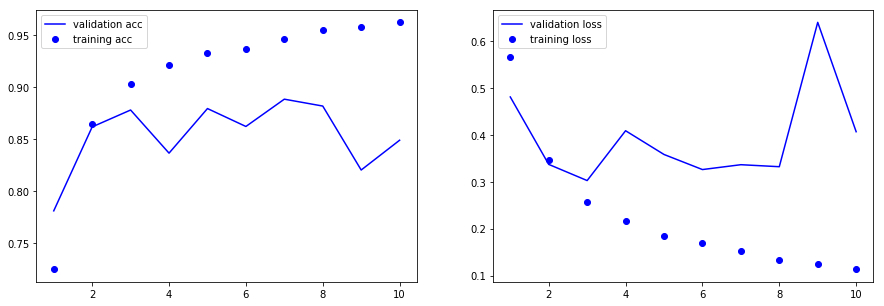

In [110]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), history.history['val_acc'], 'b', label='validation acc')
plt.plot(range(1, 11), history.history['acc'], 'bo', label='training acc')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), history.history['val_loss'], 'b', label='validation loss')
plt.plot(range(1, 11), history.history['loss'], 'bo', label='training loss')
plt.legend()
plt.show()

In [95]:
test_dir = os.path.join(imdb_dir, 'test')
test_labels = []
test_texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in tqdm.tqdm(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            with open(os.path.join(dir_name, fname), encoding='utf-8') as f:
                test_texts.append(f.read())
            test_labels.append(0 if label_type == 'neg' else 1)

100%|███████████████████████████████████████████████████████████████████████████| 12500/12500 [00:55<00:00, 225.47it/s]


In [97]:
test_sequences = tokenizer.texts_to_sequences(test_texts)
x_test = sequence.pad_sequences(test_sequences, maxlen=max_len)
y_test = np.asarray(test_labels)

In [98]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 2s 66us/step


[0.9066620665359497, 0.57644]